# Paper-Revising 
# Hyper Parameters Optimise
#### 1. This notebook is to doing the hyper parameters optimise steps
#### 2. training dataset based on the RyanSpeech: HyperParametersOptimise_4s.csv, length=4s.
#### 3. fixed 5-layer-LSTM model
#### 4. use 10 audio files, for each big branch and their sub-branch, do the same job as get the inpainted audio files, repeat and repeat.
#### 5. see which parameter set up has the best result inpainting results (by using the MOS values of NB and WB)

## NOTEBOOK ATTENTION!
### 1. The csv file of the test audio file must be no (0, 1) when generating from the preprocessing.ipynb on 6.3 part.
### 2. ALL THE .csv file when put into the model, remember use no normalization (normalise=False)


In [1]:
import os
import json
import time
import math
import matplotlib.pyplot as plt
import numpy as np
from core.data_processor import DataLoader
from core.model import Model
from keras.utils.vis_utils import plot_model

In [2]:

# 绘图展示结果
def plot_results(predicted_data, true_data):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    plt.plot(predicted_data, label='Prediction')
    plt.legend()
    plt.grid()
    plt.show()
    #plt.savefig('results_2.png')


def plot_results_multiple(predicted_data, true_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    plt.legend()
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction')
    plt.grid()
    plt.show()
    #plt.savefig('results_multiple_2.png')
    
def plot_results_multiple_onlypre(predicted_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    #ax.plot(true_data, label='True Data')
    plt.legend()
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction')
    plt.grid()
    plt.show()
    #plt.savefig('results_multiple_2.png')

# Place to change the LSTM layer number

In [6]:

#读取所需参数
configs = json.load(open('640-80-5-layers-HyperPrametersOptimise.json', 'r'))
if not os.path.exists(configs['model']['save_dir']): os.makedirs(configs['model']['save_dir'])
#读取数据
data = DataLoader(
    os.path.join('data', configs['data']['visual_filename1']),# change here to get the test dataset.
    configs['data']['visualization_full_split'], # change the train_test_split value to load the full audio file as an input.
    configs['data']['visual_filename_columns']
)

# Place to Change the model

In [4]:

#创建RNN模型
model = Model()
#mymodel = model.build_model(configs)

model_path = '/home/shh/Desktop/LSTM_Final/saved_models/paper_revising/HyperParameterOptimise/batch_size/BatchSize_1024_01082023-013030-e50.h5'
model.load_model(filepath = model_path)
#plot_model(mymodel, to_file='model.png',show_shapes=True)

[Model] Loading model from file /home/shh/Desktop/LSTM_Final/saved_models/paper_revising/HyperParameterOptimise/batch_size/BatchSize_1024_01082023-013030-e50.h5


In [7]:

#测试结果
x_test, y_test = data.get_test_data(
    seq_len=configs['data']['sequence_length'],
    normalise=False # VERY IMPORTANT!!!!!!!!!!!!!1
    #normalise=configs['data']['normalise']
)

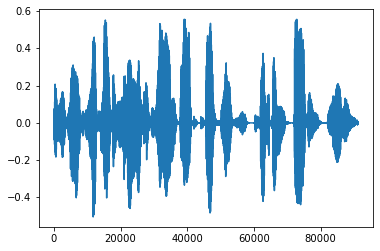

In [8]:
plt.plot(y_test)# without normal

# Predict

In [7]:
# prediction part
predictions_multiseq = model.predict_sequences_multiple(data=x_test, window_size=640, prediction_len=80,debug=False)


[Model] Predicting Sequences Multiple...


KeyboardInterrupt: 

# 1. Batch size
## 1.1 Batch size = 64

/home/shh/anaconda3/envs/LSTM/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


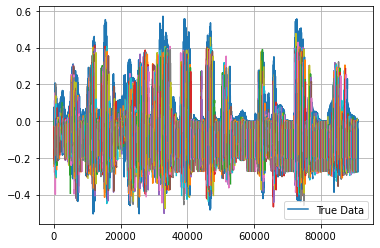

In [8]:
# test audio 1

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

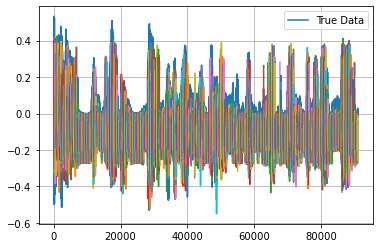

In [8]:
# test audio 2

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

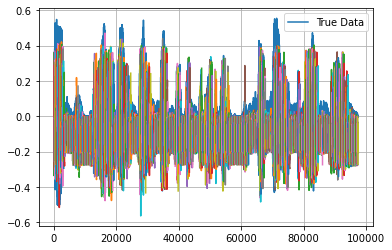

In [8]:
# test audio 3

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

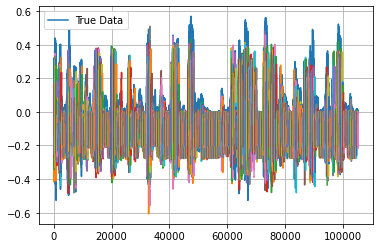

In [8]:
# test audio 4

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

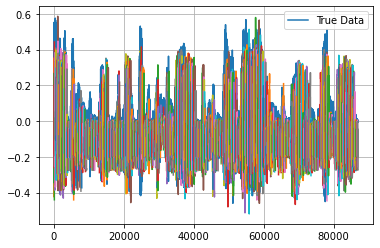

In [8]:
# test audio 5

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

/home/shh/anaconda3/envs/LSTM/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


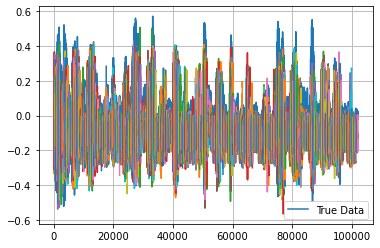

In [8]:
# test audio 6

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

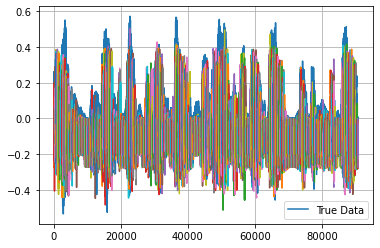

In [8]:
# test audio 7

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

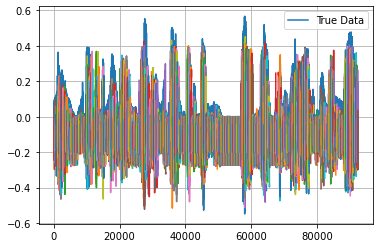

In [8]:
# test audio 8

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

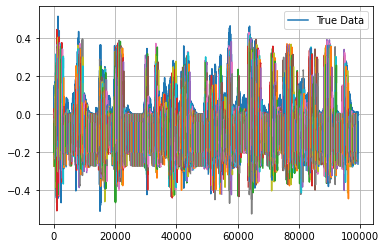

In [8]:
# test audio 9

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

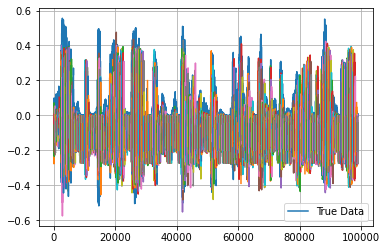

In [8]:
# test audio 10

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

In [9]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]


flat_predictions_multiseq = flatten(predictions_multiseq)
#plt.plot(flat_predictions_multiseq)

# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

#plt.plot(y_test_flatten)

import soundfile as sf
sr = 16000
sf.write("/home/shh/Desktop/LSTM_Final/revise/HyperParameterOptimise_results_new/batch_size/BatchSize_64/BatchSize64_test10_original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/revise/HyperParameterOptimise_results_new/batch_size/BatchSize_64/BatchSize64_test10_predicted.wav", flat_predictions_multiseq, sr)

## 1.2 Batch size = 128

/home/shh/anaconda3/envs/LSTM/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


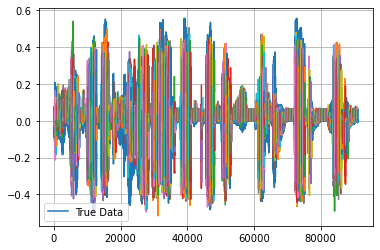

In [8]:
# test audio 1

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

/home/shh/anaconda3/envs/LSTM/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


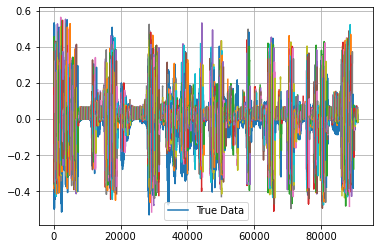

In [8]:
# test audio 2

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

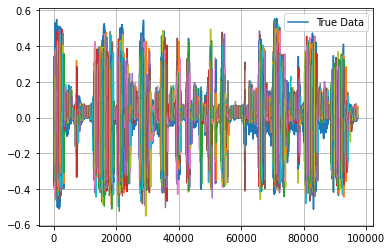

In [8]:
# test audio 3

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

/home/shh/anaconda3/envs/LSTM/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


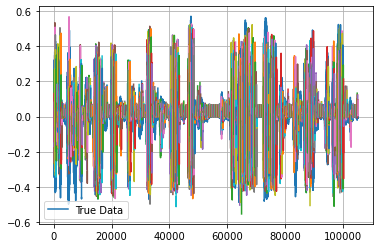

In [8]:
# test audio 4

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

/home/shh/anaconda3/envs/LSTM/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


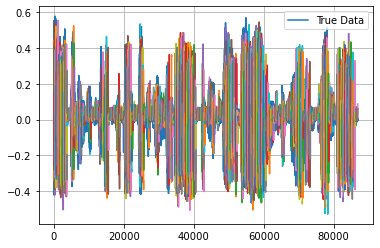

In [8]:
# test audio 5

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

/home/shh/anaconda3/envs/LSTM/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


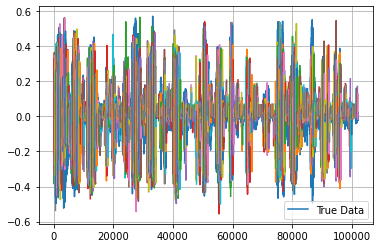

In [8]:
# test audio 6

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

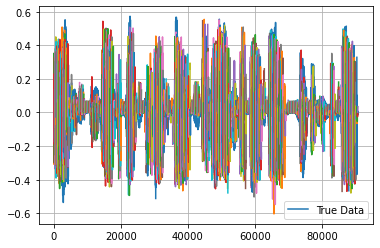

In [8]:
# test audio 7

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

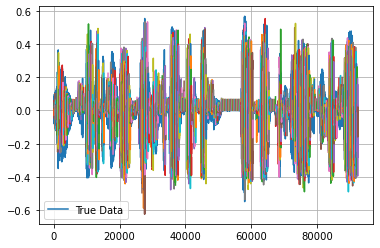

In [8]:
# test audio 8

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

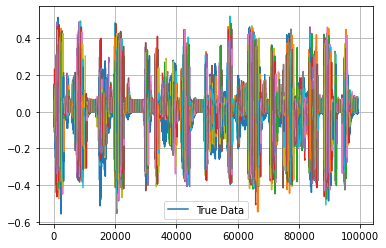

In [9]:
# test audio 9

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

/home/shh/anaconda3/envs/LSTM/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


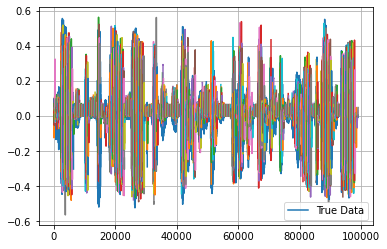

In [8]:
# test audio 10

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

In [9]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]


flat_predictions_multiseq = flatten(predictions_multiseq)
#plt.plot(flat_predictions_multiseq)

# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

#plt.plot(y_test_flatten)

import soundfile as sf
sr = 16000
sf.write("/home/shh/Desktop/LSTM_Final/revise/HyperParameterOptimise_results_new/batch_size/BatchSize_128/BatchSize128_test10_original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/revise/HyperParameterOptimise_results_new/batch_size/BatchSize_128/BatchSize128_test10_predicted.wav", flat_predictions_multiseq, sr)

## 1.3 Batch size = 256

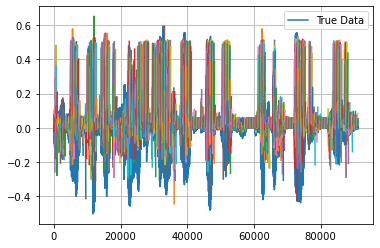

In [8]:
# test audio 1

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

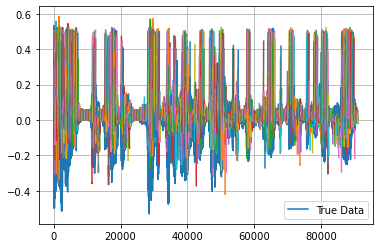

In [8]:
# test audio 2

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

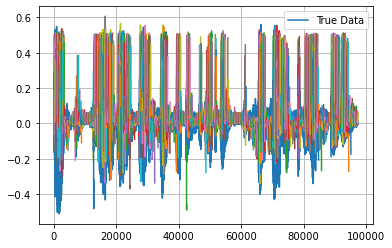

In [8]:
# test audio 3

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

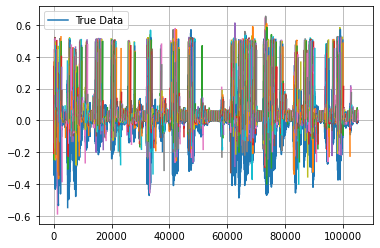

In [8]:
# test audio 4

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

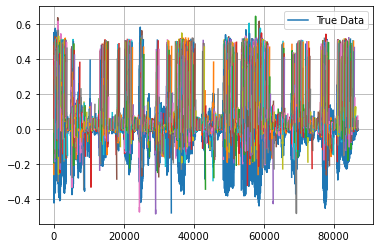

In [8]:
# test audio 5

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

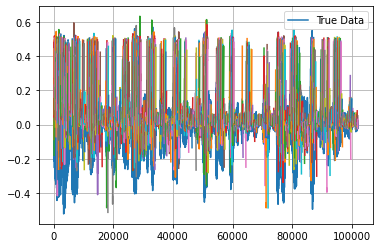

In [8]:
# test audio 6

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

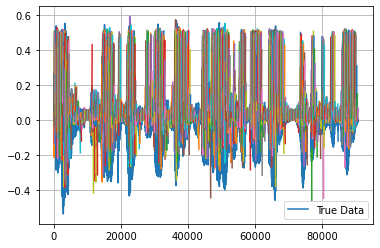

In [8]:
# test audio 7

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

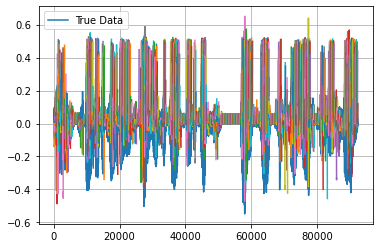

In [8]:
# test audio 8

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

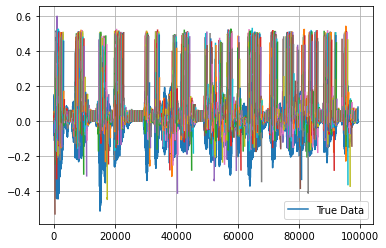

In [8]:
# test audio 9

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

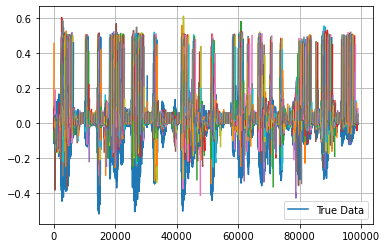

In [8]:
# test audio 10

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

In [9]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]


flat_predictions_multiseq = flatten(predictions_multiseq)
#plt.plot(flat_predictions_multiseq)

# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

#plt.plot(y_test_flatten)

import soundfile as sf
sr = 16000
sf.write("/home/shh/Desktop/LSTM_Final/revise/HyperParameterOptimise_results_new/batch_size/BatchSize_256/BatchSize256_test10_original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/revise/HyperParameterOptimise_results_new/batch_size/BatchSize_256/BatchSize256_test10_predicted.wav", flat_predictions_multiseq, sr)

## 1.4 Batch size = 512

/home/shh/anaconda3/envs/LSTM/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


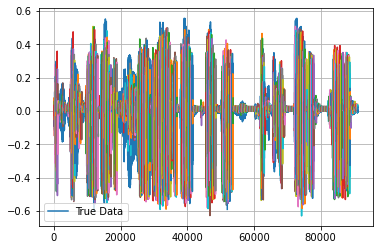

In [8]:
# test audio 1

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

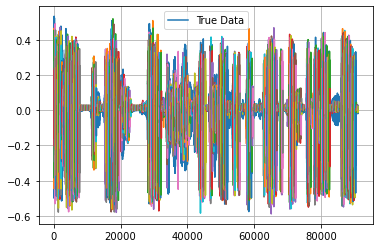

In [8]:
# test audio 2

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

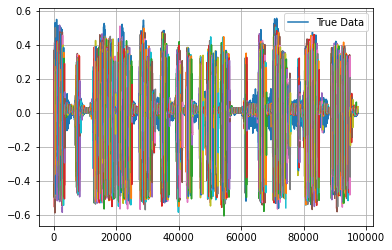

In [8]:
# test audio 3

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

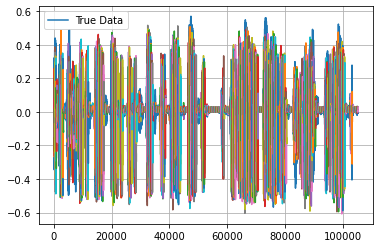

In [8]:
# test audio 4

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

/home/shh/anaconda3/envs/LSTM/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


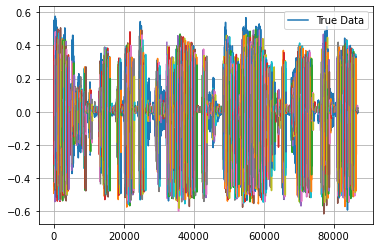

In [8]:
# test audio 5

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

/home/shh/anaconda3/envs/LSTM/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


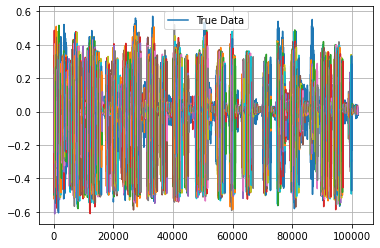

In [8]:
# test audio 6

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

/home/shh/anaconda3/envs/LSTM/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


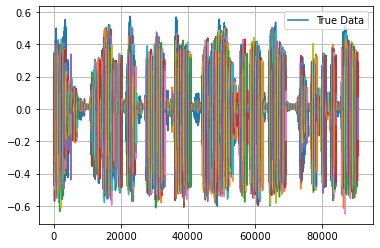

In [8]:
# test audio 7

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

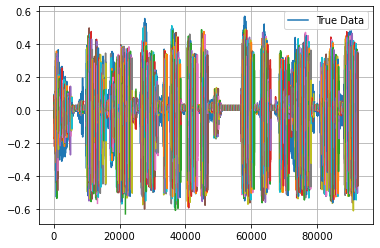

In [8]:
# test audio 8

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

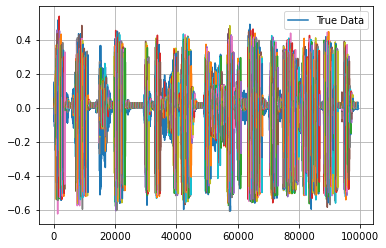

In [8]:
# test audio 9

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

/home/shh/anaconda3/envs/LSTM/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


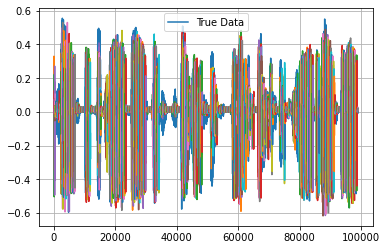

In [8]:
# test audio 10

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

In [9]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]


flat_predictions_multiseq = flatten(predictions_multiseq)
#plt.plot(flat_predictions_multiseq)

# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

#plt.plot(y_test_flatten)

import soundfile as sf
sr = 16000
sf.write("/home/shh/Desktop/LSTM_Final/revise/HyperParameterOptimise_results_new/batch_size/BatchSize_512/BatchSize512_test10_original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/revise/HyperParameterOptimise_results_new/batch_size/BatchSize_512/BatchSize512_test10_predicted.wav", flat_predictions_multiseq, sr)

In [ ]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")

## 1.5 Batch size = 1024

In [1]:
# test audio 1

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

NameError: name 'plot_results_multiple' is not defined

In [2]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]


flat_predictions_multiseq = flatten(predictions_multiseq)
#plt.plot(flat_predictions_multiseq)

# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

#plt.plot(y_test_flatten)

import soundfile as sf
sr = 16000
sf.write("/home/shh/Desktop/LSTM_Final/revise/HyperParameterOptimise_results_new/batch_size/BatchSize_1024/BatchSize1024_test1_original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/revise/HyperParameterOptimise_results_new/batch_size/BatchSize_1024/BatchSize1024_test1_predicted.wav", flat_predictions_multiseq, sr)

NameError: name 'predictions_multiseq' is not defined

In [ ]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")

In [ ]:
import os
import json
import time
import math
import matplotlib.pyplot as plt
import numpy as np
from core.data_processor import DataLoader
from core.model import Model
from keras.utils.vis_utils import plot_model


# 绘图展示结果
def plot_results(predicted_data, true_data):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    plt.plot(predicted_data, label='Prediction')
    plt.legend()
    plt.grid()
    plt.show()
    #plt.savefig('results_2.png')


def plot_results_multiple(predicted_data, true_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    plt.legend()
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction')
    plt.grid()
    plt.show()
    #plt.savefig('results_multiple_2.png')
    
def plot_results_multiple_onlypre(predicted_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    #ax.plot(true_data, label='True Data')
    plt.legend()
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction')
    plt.grid()
    plt.show()
    #plt.savefig('results_multiple_2.png')

In [3]:
#读取所需参数
configs = json.load(open('640-80-5-layers-HyperPrametersOptimise.json', 'r'))
if not os.path.exists(configs['model']['save_dir']): os.makedirs(configs['model']['save_dir'])
#读取数据
data = DataLoader(
    os.path.join('data', configs['data']['visual_filename1']),# change here to get the test dataset.
    configs['data']['visualization_full_split'], # change the train_test_split value to load the full audio file as an input.
    configs['data']['visual_filename_columns']
)

# Place to Change the model

#创建RNN模型
model = Model()
mymodel = model.build_model(configs)

model_path = '/home/shh/Desktop/LSTM_Final/saved_models/paper_revising/HyperParameterOptimise/batch_size/BatchSize_1024_01082023-013030-e50.h5'
model.load_model(filepath = model_path)
#plot_model(mymodel, to_file='model.png',show_shapes=True)

#测试结果
x_test, y_test = data.get_test_data(
    seq_len=configs['data']['sequence_length'],
    normalise=False # VERY IMPORTANT!!!!!!!!!!!!!1
    #normalise=configs['data']['normalise']
)

# predict
# prediction part
predictions_multiseq = model.predict_sequences_multiple(data=x_test, window_size=640, prediction_len=80,debug=False)



In [ ]:
# test audio 2

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

In [ ]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]


flat_predictions_multiseq = flatten(predictions_multiseq)
#plt.plot(flat_predictions_multiseq)

# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

#plt.plot(y_test_flatten)

import soundfile as sf
sr = 16000
sf.write("/home/shh/Desktop/LSTM_Final/revise/HyperParameterOptimise_results_new/batch_size/BatchSize_1024/BatchSize1024_test1_original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/revise/HyperParameterOptimise_results_new/batch_size/BatchSize_1024/BatchSize1024_test1_predicted.wav", flat_predictions_multiseq, sr)

In [ ]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")

# 2 Dropout rate
## 2.1 Dropout rate = 0.1

## 2.2 Dropout rate = 0.2
## same as 1.4, so no need to redo

## 2.3 Dropout rate = 0.3

## 2.4 Dropout rate = 0.4

## 2.5 Dropout rate = 0.5

# 3 Dropout layer location

## 3.1 after 1+5
## same as 1.4, but still retrain and redo

## 3.2 after 2+5

## 3.3 after 3+5

## 3.4 after 4+5

## 3.5 after every LSTM layer

In [15]:
import soundfile as sf
sr = 16000
#sf.write("/home/shh/Desktop/LSTM_Final/revise/HyperParameterOptimise_results/dropout_layer_location/original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/revise/HyperParameterOptimise_results/dropout_layer_location/dropout_layer_location_all _predicted.wav", flat_predictions_multiseq, sr)